### Student Information
Name: 鍾昀恩

Student ID: 111062337

GitHub ID: yun206000

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [2]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

In [3]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv') # read the csv file
print(df.head())

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

### Exercise 1
Print out the *title* data for the first three samples in the dataset.

In [4]:
for i in range(3):
    print(f"Example {i+1}:")
    print(df['title'][i])

Example 1:
Retardation is on the menu boys! WSB is so back
Example 2:
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Example 3:
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?


### Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
df.query('label == 1.0 and upvotes > 20')

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.700000,-1.0,"['market', 'silver']",1.0
169,post,2023-04-13 15:18:33,12kslle,stockstobuytoday,NEWS: Star Navigation Announces Corporate Update,digamymagadisg88,https://www.reddit.com/r/stockstobuytoday/comm...,31,0.0,1.00,Just stumbled upon some exciting news about St...,0.700439,0.128987,1.0,"['Air Peace', 'news', 'cutting-edge', 'Nigeria...",1.0
250,post,2024-10-21 14:31:33,1g8r349,stockstobuytoday,New company on the CSE Syntheia Corp $SYAI.CN,Bright-Ad-1329,https://www.reddit.com/r/stockstobuytoday/comm...,50,0.0,0.99,"Hey everyone, i was looking into a new company...",0.526771,0.150321,1.0,"['incoming', 'manage', 'Corp', 'service', 'way...",1.0
266,comment,2025-04-11 21:22:20,mmmrtzq,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,OPINION_IS_REGARDED,https://www.reddit.com/r/wallstreetbets/commen...,22,NaN,NaN,I am so addicted to this market I can't wait f...,0.600000,-0.400000,-1.0,"['Monday', 'market']",1.0
336,comment,2025-04-11 20:50:05,mmmlsem,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,bullrfuk,https://www.reddit.com/r/wallstreetbets/commen...,48,NaN,NaN,"China: ""We are going to build our future on sc...",0.426136,0.184091,1.0,"['technology', 'LMAO', 'future', 'science', 'f...",1.0
436,post,2024-09-12 13:52:50,1ff33tf,stockstobuytoday,Is anyone looking into $ATLX,Diligent-Emphasis-55,https://www.reddit.com/r/stockstobuytoday/comm...,34,0.0,1.00,Lithium has become a huge part of the clean en...,0.743750,0.088021,1.0,"['DD', 'shift', 'concentrate', 'Lithium', 'cou...",1.0
677,comment,2025-04-11 20:00:44,mmmc2xc,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,Ok_Competition1524,https://www.reddit.com/r/wallstreetbets/commen...,32,NaN,NaN,China increases tariffs on US. \r\n\r\nMarket ...,1.000000,1.000000,1.0,"['Balanced', 'US', 'China', 'Market']",1.0
700,comment,2025-04-12 1:09:59,mmntum6,wallstreetbets,Retail giant TARGET has now declined for 10 co...,CuttyAllgood,https://i.redd.it/7tl6puv9waue1.jpeg,36,NaN,NaN,Donno why you’re getting downvoted. You’re not...,0.900000,-0.500000,-1.0,"['Donno', 'IMO']",1.0
787,comment,2025-04-11 4:28:30,mmiflsp,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,whatproblems,https://i.redd.it/31r650bss4ue1.jpeg,55,NaN,NaN,good reminder there’s a bigger game than just ...,0.480000,-0.100000,-1.0,"['idiot', 'picture', 't', 'deficits…', '’', 'r...",1.0


### Exercise 3
Try to fetch records belonging to the ```stockstobuytoday``` subreddit, and query every 10th record. Only show the first 5 records.

In [6]:
df[df["subreddit"]=="stockstobuytoday"][::10][0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
59,comment,2021-04-14 16:24:10,gui4bru,stockstobuytoday,r/stockstobuytoday Lounge,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,heard chatter upto $350,0.000000,0.000000,0.0,"['heard', 'chatter']",0.0
112,comment,2023-12-19 19:19:55,ke2q751,stockstobuytoday,Anyone been looking into OneMedNet?,OkRideMeThenBB,https://www.reddit.com/r/stockstobuytoday/comm...,0,NaN,NaN,"nice, good info, good post.",0.733333,0.666667,1.0,"['info', 'post']",1.0
158,post,2022-02-27 14:56:07,t2px6r,stockstobuytoday,What will happen with 2022?,Superb_Nebula8800,https://www.reddit.com/r/stockstobuytoday/comm...,8,0.0,0.91,Investors brace for more volatility as the wes...,0.000000,0.000000,0.0,"['Russia', 'west', 'access', 'volatility', 'Sw...",0.0
186,comment,2021-12-10 18:48:52,ho0pqki,stockstobuytoday,$PPSI short squeeze 43% shorted,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Date|Symbol|ShortVolume|ShortExemptVolume|Tota...,0.000000,0.000000,0.0,"['%', 'Q', 'N', 'Date|Symbol|ShortVolume|Short...",0.0


Check if there's missing value.

In [7]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


Apparently, there are a lot of missing value in `downvotes` and `upvote_ratio`.
Let's see exactly how high the rate is.

In [8]:
missing_rate = df['downvotes'].isnull().mean()
print(f"Missing rate for 'downvotes': {missing_rate:.2%}")
missing_rate = df['upvote_ratio'].isnull().mean()
print(f"Missing rate for 'upvote_ratio': {missing_rate:.2%}")

Missing rate for 'downvotes': 92.44%
Missing rate for 'upvote_ratio': 92.44%


Eliminate the colums.

In [9]:
new_df = df.drop(columns=['downvotes', 'upvote_ratio'], inplace=False)
print(f"Shape of original dataframe: {df.shape} -> Shape after dropping columns: {new_df.shape}")

Shape of original dataframe: (847, 16) -> Shape after dropping columns: (847, 14)


### Exercise 4
Calculate the missing values in every record instead of every column.

In [10]:
new_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

Check if there's duplicated data.

In [11]:
sum(new_df.duplicated())

0

Draw a bar chart for `subreddit`.

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

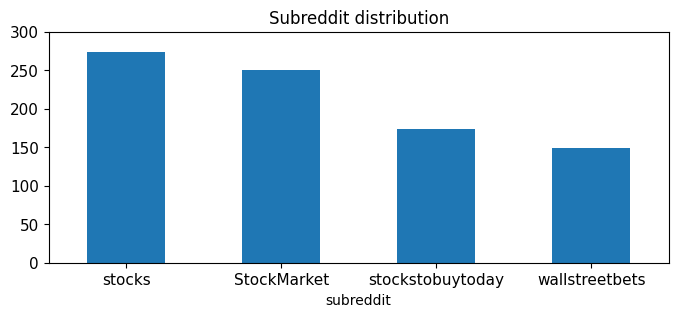

In [12]:
import matplotlib.pyplot as plt
print(new_df.subreddit.value_counts())
new_df.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Sampling

In [13]:
new_df_sample = new_df.sample(n=300)

In [14]:
len(new_df_sample)

300

In [15]:
new_df_sample[0:4] # Print first 4 rows

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label
662,comment,2025-03-04 23:42:54,mg1zjxj,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,bladezdivide,https://www.reddit.com/r/stocks/comments/1j0w7...,2,High risk high beta portfolio but it's 50% uni...,0.54,0.160,1.0,"['amazon', 'portfolio', 'reddit', '%', 'beta',...",0.0
454,comment,2025-04-10 14:39:25,mme8pov,StockMarket,How do you feel about a sitting president maki...,Tax__Player,https://apnews.com/article/trump-truth-social-...,1,I'm happy for him.,1.00,0.800,1.0,[],1.0
64,comment,2025-04-11 3:56:42,mmibkr4,StockMarket,$ U.S. dollar value (crashing),SpakenBacon,https://i.redd.it/atvlo83gk4ue1.jpeg,-1,That's called winning! /s,0.75,0.625,1.0,"['winning', '/s']",-1.0
628,comment,2025-04-10 16:47:22,mmeyntx,StockMarket,How do you feel about a sitting president maki...,Elegant_Hurry2258,https://apnews.com/article/trump-truth-social-...,2,Remember when Conservatives though it was impr...,0.00,0.000,0.0,"['farm', 'Remember', 'President', 'peanut']",0.0


### Exercise 6
Check if there's duplicate data in `new_df_sample`.

In [16]:
sum(new_df_sample.duplicated())

0

### Exercise 7
Automate the `ylim` parameter instead of hardcoding it.

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

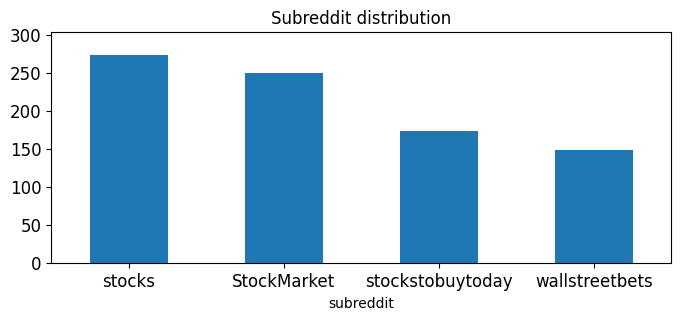

In [17]:
print(new_df.subreddit.value_counts())

new_df.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit distribution',
                                           ylim = [0, new_df.subreddit.value_counts().max()+30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### Exercise 8
Do a side-by-side comparison of the distribution between the two datasets.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'StockMarket'),
  Text(1, 0, 'stocks'),
  Text(2, 0, 'stockstobuytoday'),
  Text(3, 0, 'wallstreetbets')])

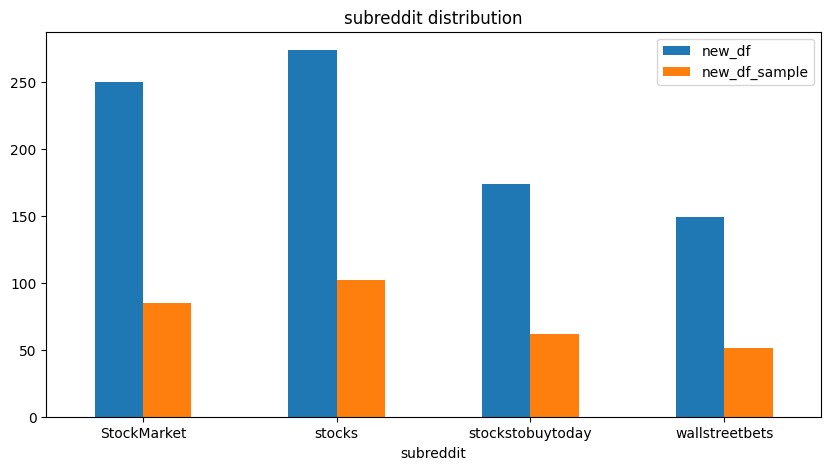

In [18]:
new_df.groupby('subreddit').size().rename('new_df').to_frame().join(
    new_df_sample.groupby('subreddit').size().rename('new_df_sample').to_frame(),
).plot(kind='bar', title='subreddit distribution', figsize=(10, 5))
plt.xticks(rotation=0)

### Feature Creation

In [19]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
new_df_sample['unigrams'] = new_df_sample['title'].apply(lambda x: dmh.tokenize_text(x))

In [21]:
new_df_sample[0:4]['unigrams']

662    [Rate, My, Portfolio, -, r/Stocks, Quarterly, ...
454    [How, do, you, feel, about, a, sitting, presid...
64              [$, U.S., dollar, value, (, crashing, )]
628    [How, do, you, feel, about, a, sitting, presid...
Name: unigrams, dtype: object

In [22]:
new_df_sample[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,unigrams
662,comment,2025-03-04 23:42:54,mg1zjxj,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,bladezdivide,https://www.reddit.com/r/stocks/comments/1j0w7...,2,High risk high beta portfolio but it's 50% uni...,0.54,0.160,1.0,"['amazon', 'portfolio', 'reddit', '%', 'beta',...",0.0,"[Rate, My, Portfolio, -, r/Stocks, Quarterly, ..."
454,comment,2025-04-10 14:39:25,mme8pov,StockMarket,How do you feel about a sitting president maki...,Tax__Player,https://apnews.com/article/trump-truth-social-...,1,I'm happy for him.,1.00,0.800,1.0,[],1.0,"[How, do, you, feel, about, a, sitting, presid..."
64,comment,2025-04-11 3:56:42,mmibkr4,StockMarket,$ U.S. dollar value (crashing),SpakenBacon,https://i.redd.it/atvlo83gk4ue1.jpeg,-1,That's called winning! /s,0.75,0.625,1.0,"['winning', '/s']",-1.0,"[$, U.S., dollar, value, (, crashing, )]"
628,comment,2025-04-10 16:47:22,mmeyntx,StockMarket,How do you feel about a sitting president maki...,Elegant_Hurry2258,https://apnews.com/article/trump-truth-social-...,2,Remember when Conservatives though it was impr...,0.00,0.000,0.0,"['farm', 'Remember', 'President', 'peanut']",0.0,"[How, do, you, feel, about, a, sitting, presid..."


### Feature Subset Selection

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
new_df_counts = count_vect.fit_transform(new_df.text) #learn the vocabulary and return document-term matrix
print(new_df_counts[1])

  (np.int32(0), np.int32(3696))	1
  (np.int32(0), np.int32(388))	1
  (np.int32(0), np.int32(2024))	2
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(4244))	1
  (np.int32(0), np.int32(1168))	1
  (np.int32(0), np.int32(3858))	1
  (np.int32(0), np.int32(1409))	1
  (np.int32(0), np.int32(2402))	1
  (np.int32(0), np.int32(538))	1
  (np.int32(0), np.int32(1083))	1
  (np.int32(0), np.int32(175))	2
  (np.int32(0), np.int32(3628))	1
  (np.int32(0), np.int32(2161))	1
  (np.int32(0), np.int32(3848))	1
  (np.int32(0), np.int32(1568))	1
  (np.int32(0), np.int32(2878))	1
  (np.int32(0), np.int32(2645))	1
  (np.int32(0), np.int32(887))	1
  (np.int32(0), np.int32(3477))	1
  (np.int32(0), np.int32(1412))	2
  (np.int32(0), np.int32(3795))	1
  (np.int32(0), np.int32(2918))	1


In [24]:
count_vect.get_feature_names_out()[789]

'chest'

### Exercise 9
Analyze the first record of `new_df` with the new analyzer.

In [25]:
analyze = count_vect.build_analyzer()
analyze(new_df.text[0])

['calls', 'on', 'retards']

Now let us look at the term-document matrix we built above.

In [26]:
new_df_counts.shape

(847, 4346)

In [27]:
print(new_df_counts[0:5, 0:100].toarray())
print(new_df_counts[0:5, 100:200].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

### Exercise 10
Notice that there is a 4 in the fourth record. Can you provide code that can verify what word this 4 represents from the vocabulary. Try to do this as efficient as possible.

In [28]:
count_vect.get_feature_names_out()[np.sort(new_df_counts[3].nonzero()[1])[1]]

'about'

### Using Seaborn to Do Visualization


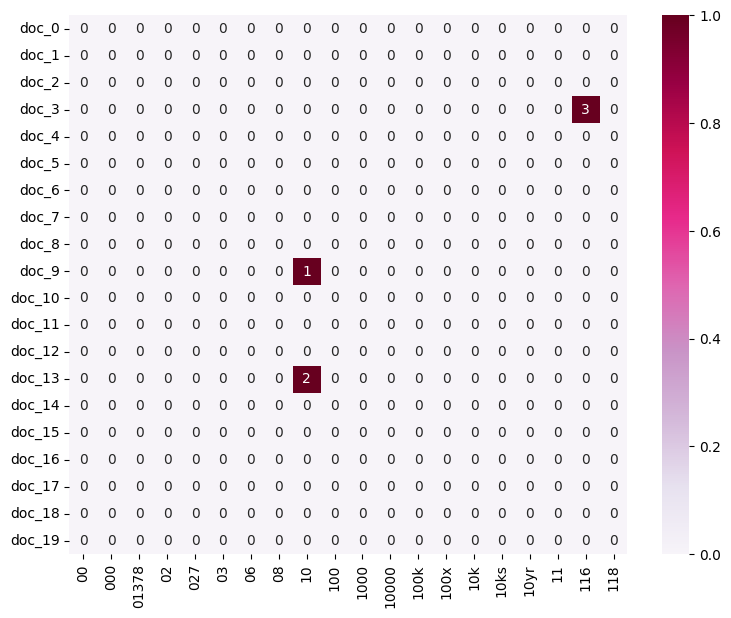

In [29]:
import seaborn as sns

# first twenty features only
plot_x = count_vect.get_feature_names_out()[0:20] # ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_df.index)[0:20]]
plot_z = new_df_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 11

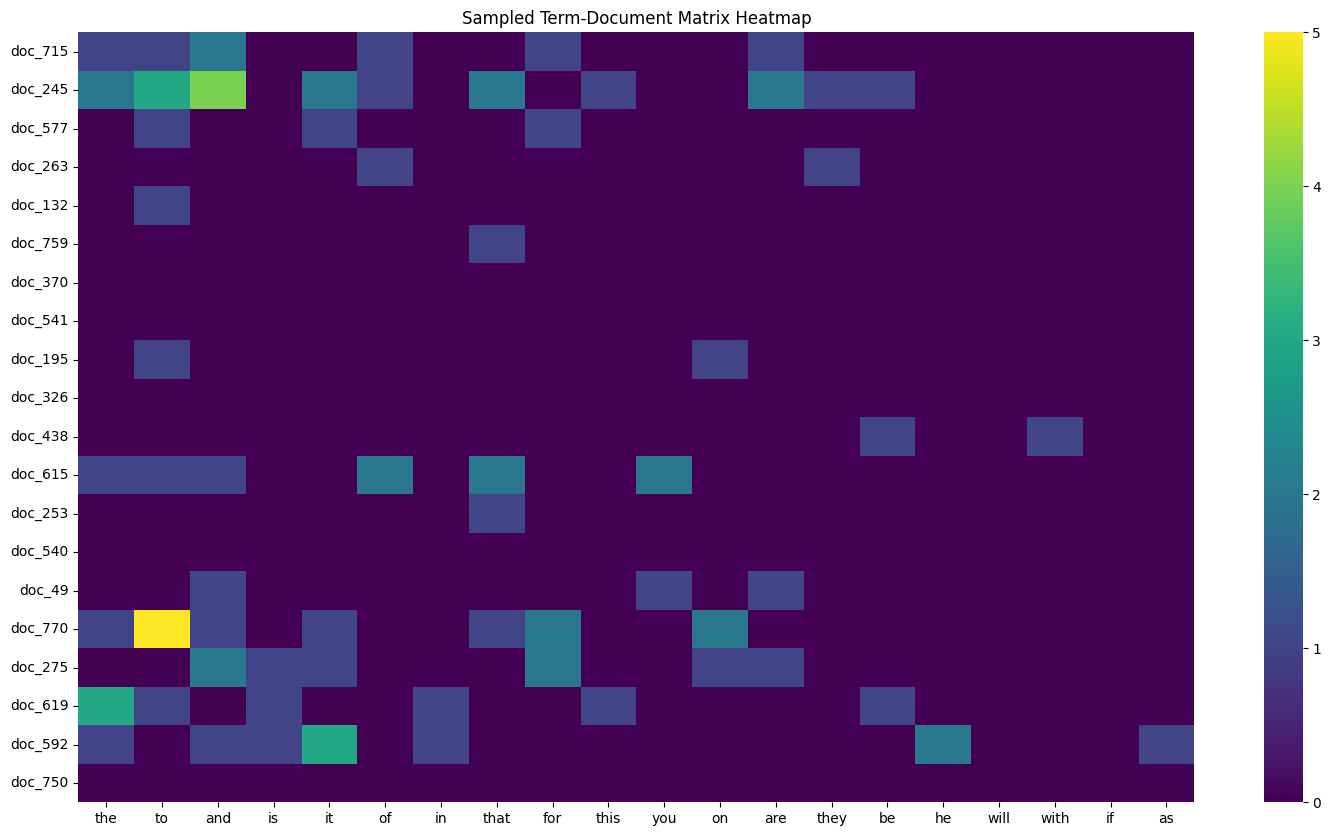

In [30]:
###
# I pick up 20 most frequent terms and 20 random documents to see the frequency distribution of these frequent terms.
# And I use the heatmap to show the term frequencies in these documents.
###
n_docs = 20
n_terms = 20

doc_indices = np.random.choice(new_df_counts.shape[0], n_docs, replace=False)
term_frequencies = np.asarray(new_df_counts.sum(axis=0))[0]
# 取最大 n_terms 的 index
top_term_indices = np.argsort(term_frequencies)[-n_terms:]
# 再根據 term_frequencies 的值排序
top_term_indices_sorted = top_term_indices[np.argsort(term_frequencies[top_term_indices])[::-1]]

plot_z = new_df_counts[doc_indices, :][:, top_term_indices_sorted].toarray()
plot_x = count_vect.get_feature_names_out()[top_term_indices_sorted]
plot_y = [f"doc_{i}" for i in doc_indices]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.figure(figsize=(18, 10))
sns.heatmap(df_todraw, cmap="viridis", vmin=0, vmax=plot_z.max())
plt.title("Sampled Term-Document Matrix Heatmap")
plt.show()

As you can see, the most frequent terms are words like "the", "to" and "and". This result is similar to what we have seen in the master assignment. However, these words aren't appearing in almost every randomly selected articles. I guess it's because this dataset contains comments and articles from Reddit, which might not be that long and completed like the document-based dataset we used in the master assignment.

### Transform Text Data

In [31]:
term_frequencies = []
for j in range(0,new_df_counts.shape[1]):
    term_frequencies.append(sum(new_df_counts[:,j].toarray()))

In [32]:
term_frequencies

[array([4]),
 array([6]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([21]),
 array([11]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([5]),
 array([3]),
 array([1]),
 array([8]),
 array([1]),
 array([2]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([8]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([2]),
 array([1]),
 array([3]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([7]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([2]),
 array([6]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([4]),
 array([1]),
 array([3]),
 array([1]),
 array([1]),
 array([2]

In [33]:
term_frequencies = np.asarray(new_df_counts.sum(axis=0))[0]
term_frequencies

array([4, 6, 1, ..., 1, 1, 1])

C:\Users\angel\AppData\Local\Temp\ipykernel_23560\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

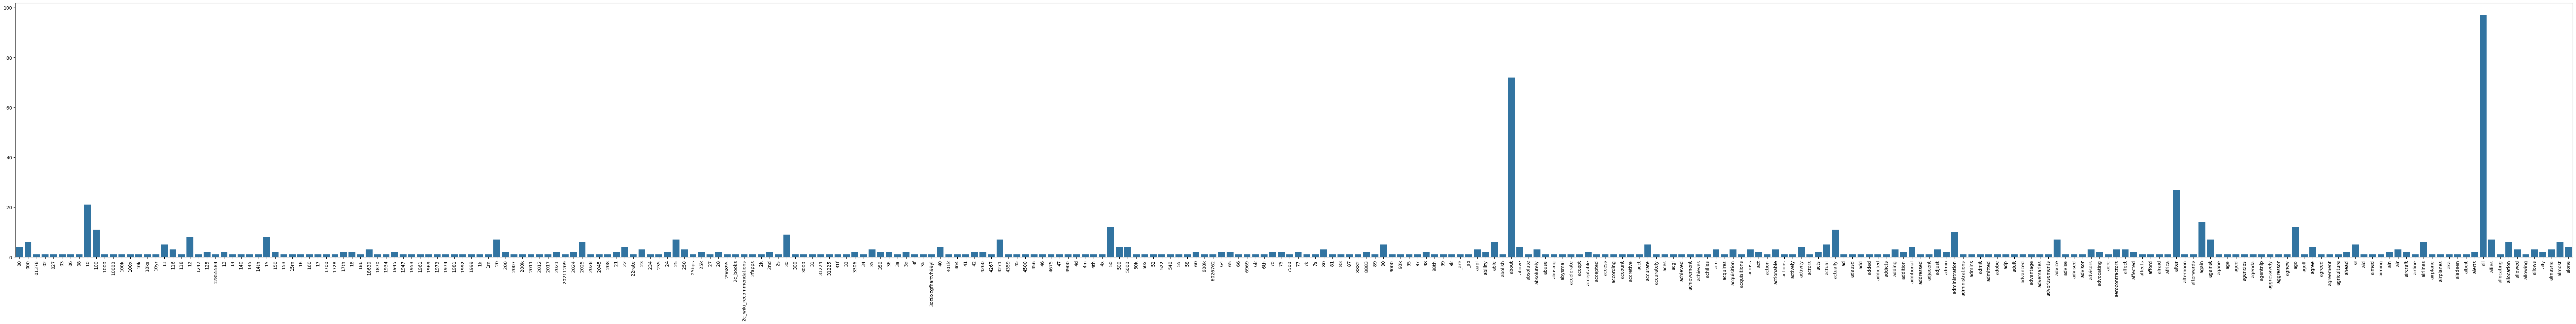

In [34]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### Exercise 12
A Nice visualization using plotly.

In [48]:
import plotly.express as px
terms = count_vect.get_feature_names_out()[:300]
freqs = term_frequencies[:300]

fig = px.bar(x=terms, y=freqs, labels={'x': 'Terms', 'y': 'Frequency'}, title='Term Frequencies (First 300)')
fig.update_xaxes(tickangle=90)
fig.update_layout(width=1800, height=500)
fig.show()

### Exercise 13
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [36]:
# Answer here
threshold = 150 # Using a threshold of 150 to filter out less frequent terms
mask = term_frequencies >= threshold
filtered_terms = count_vect.get_feature_names_out()[mask]
filtered_freqs = term_frequencies[mask]

fig = px.bar(x=filtered_terms, y=filtered_freqs, labels={'x': 'Terms', 'y': 'Frequency'}, title=f'Terms with Frequency ≥ {threshold}')
fig.update_xaxes(tickangle=90)
fig.update_layout(width=1000, height=500)
fig.show()

### Exercise 14
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).

In [37]:
threshold = 150 # Using a threshold of 150 to filter out less frequent terms
mask = term_frequencies >= threshold
filtered_terms = count_vect.get_feature_names_out()[mask]
filtered_freqs = term_frequencies[mask]
# Sort by frequency (descending)
sorted_indices = np.argsort(filtered_freqs)[::-1]
sorted_terms = filtered_terms[sorted_indices]
sorted_freqs = filtered_freqs[sorted_indices]

fig = px.bar(x=sorted_terms, y=sorted_freqs, labels={'x': 'Terms', 'y': 'Frequency'}, title=f'Terms with Frequency ≥ {threshold} (Sorted)')
fig.update_xaxes(tickangle=90)
fig.update_layout(width=1000, height=500)
fig.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_23560\1525322602.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

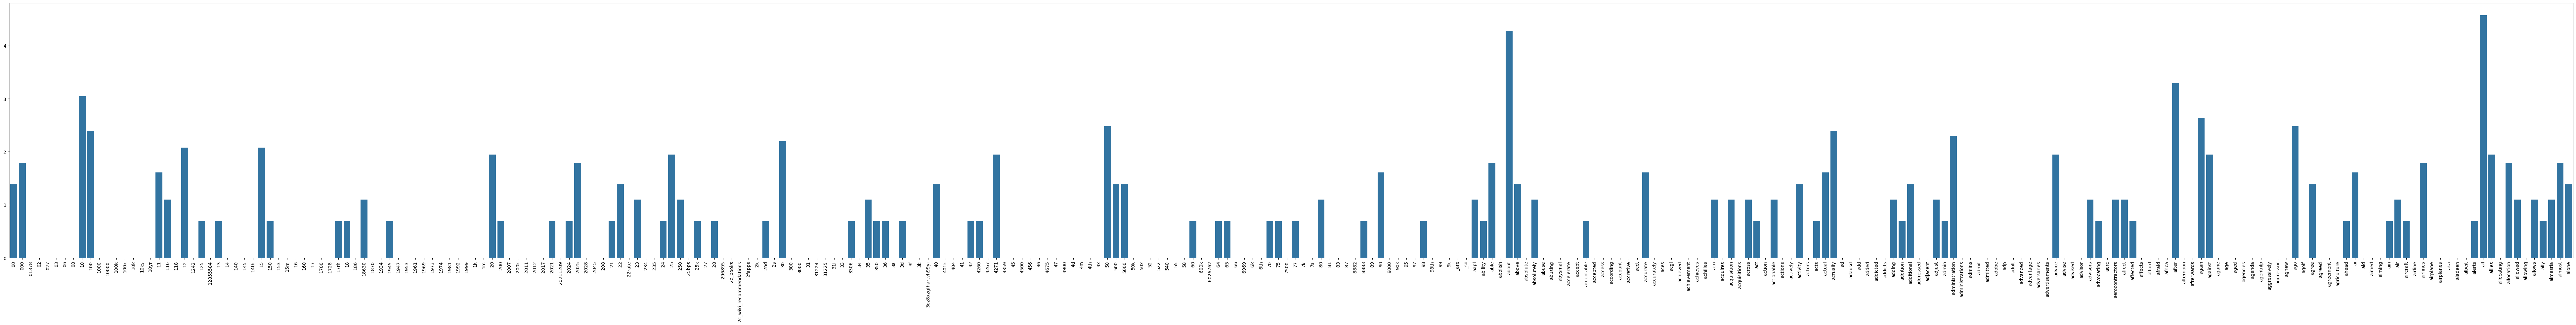

In [38]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### Exercise 15
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [39]:
threshold = np.log(150) # Change the threshold to log scale
mask = [(i >= threshold) for i in term_frequencies_log]
filtered_terms = count_vect.get_feature_names_out()[mask]
filtered_freqs = [i for i in term_frequencies_log if i >= threshold]
# Sort by frequency (descending)
sorted_indices = np.argsort(filtered_freqs)[::-1]
sorted_terms = filtered_terms[sorted_indices]
sorted_freqs = np.sort(filtered_freqs)[::-1]

fig = px.bar(x=sorted_terms, y=sorted_freqs, labels={'x': 'Terms', 'y': 'Frequency'}, title=f'Terms with Frequency ≥ {threshold} (Sorted)')
fig.update_xaxes(tickangle=90)
fig.update_layout(width=1000, height=500)
fig.show()

### Findings
# When using log scale, the difference between high-frequency and low-frequency terms is reduced.
# This allows us to see the distribution of term frequencies more clearly, especially for terms that are not extremely frequent.

### New Data Visualization

#### Volume Over Time
Shows how the number of posts or comments changes over time, revealing activity trends or major discussion spikes.

In [40]:
import pandas as pd
import plotly.express as px
df['datetime'] = pd.to_datetime(df['datetime'])
yearly = df.set_index('datetime').resample('YE').size().reset_index(name='count') # Resample by year end
fig = px.line(yearly, x='datetime', y='count', title='Posts/comments per year')
fig.show()

#### Sentiment Time Series (Rolling Average)
Tracks how average sentiment (polarity) evolves over time using a rolling window for smoothing.

In [41]:
import plotly.graph_objects as go
window = 7
tmp = df.set_index('datetime')[['polarity']].resample('D').mean().fillna(0)
tmp['rolling'] = tmp['polarity'].rolling(window).mean()
tmp = tmp.reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=tmp['datetime'], y=tmp['polarity'], mode='lines+markers', name='daily_mean_polarity'))
fig.add_trace(go.Scatter(x=tmp['datetime'], y=tmp['rolling'], mode='lines', name=f'{window}-period_rolling'))
fig.update_layout(title=f'polarity over time (rolling {window})', xaxis_title='Date', yaxis_title='polarity')
fig.show()

#### Sentiment Distributions
Visualizes the overall spread of emotional tone (e.g., polarity or subjectivity) across all posts or grouped by subreddit/label.

In [42]:
for c in ['polarity','subjectivity']:
        if c not in df.columns:
            continue
        fig = px.histogram(df, x=c, nbins=50, title=f'Distribution of {c}')
        fig.show()

#### Top Entities and Word Cloud
Highlights the most frequently mentioned entities (e.g., company names, people, topics).

In [43]:
import re

def parse_entities_general(x):
    """
    Extract words directly from a messy 'entities' field.
    Handles formats like:
    - ['word']
    - "['word1', 'word2']"
    - word1, word2
    - (word1; word2)
    - or even mixed messy text
    Returns a list of normalized tokens.
    """
    if pd.isna(x):
        return []
    s = str(x)
    # Find alphanumeric words (including underscore). This ignores punctuation and brackets.
    tokens = re.findall(r"\b[a-zA-Z0-9_]+\b", s)
    return [t for t in tokens]


# Create a new column with parsed entities
df['parsed_entities'] = df['entities'].apply(parse_entities_general)

In [44]:
print(df[['entities', 'parsed_entities']].head(10))

                                            entities  \
0                                                 []   
1              ['Stunt', 'company', 'deal', 'place']   
2                                         ['ticker']   
3  ['watercraft', 'skill', 'power', ']', 'feat', ...   
4                                                 []   
5                                ['tonight', 'puss']   
6  ['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...   
7             ['Confirmed', 'mouth', 'word', 'trap']   
8  ['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...   
9                          ['HLGN', 'Hurry', 'moon']   

                                     parsed_entities  
0                                                 []  
1                      [Stunt, company, deal, place]  
2                                           [ticker]  
3  [watercraft, skill, power, feat, Marine, Main,...  
4                                                 []  
5                                    [tonight, puss] 

Wordcloud saved to wordcloud.png


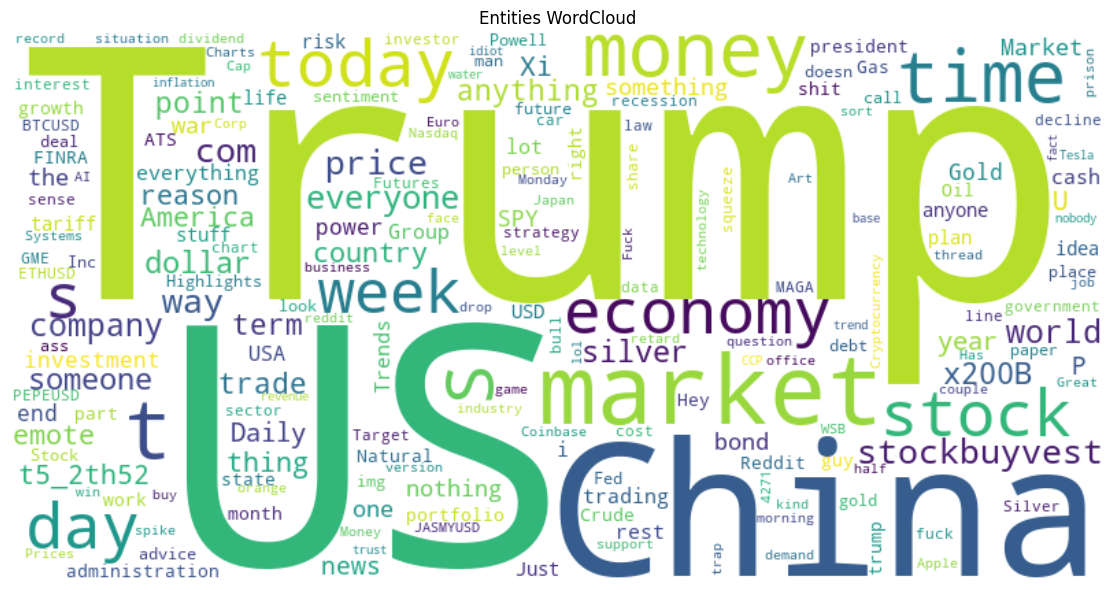

In [45]:
from collections import Counter
from wordcloud import WordCloud
top_k=10
all_entities = [e for row in df['parsed_entities'] for e in row if e]
counts = Counter(all_entities)
most = counts.most_common(top_k)
ent_df = pd.DataFrame(most, columns=['entity','count'])
# bar chart
fig = px.bar(ent_df, x='count', y='entity', orientation='h', title=f'Top {top_k} entities')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()
# wordcloud (matplotlib)
if len(counts)>0:
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counts)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Entities WordCloud')
    plt.tight_layout()
    plt.savefig('wordcloud.png', dpi=150)
    print(f'Wordcloud saved to wordcloud.png')
    plt.show()

#### Entity Co-occurrence Network
Shows which entities are often mentioned together, forming a semantic or topical network.

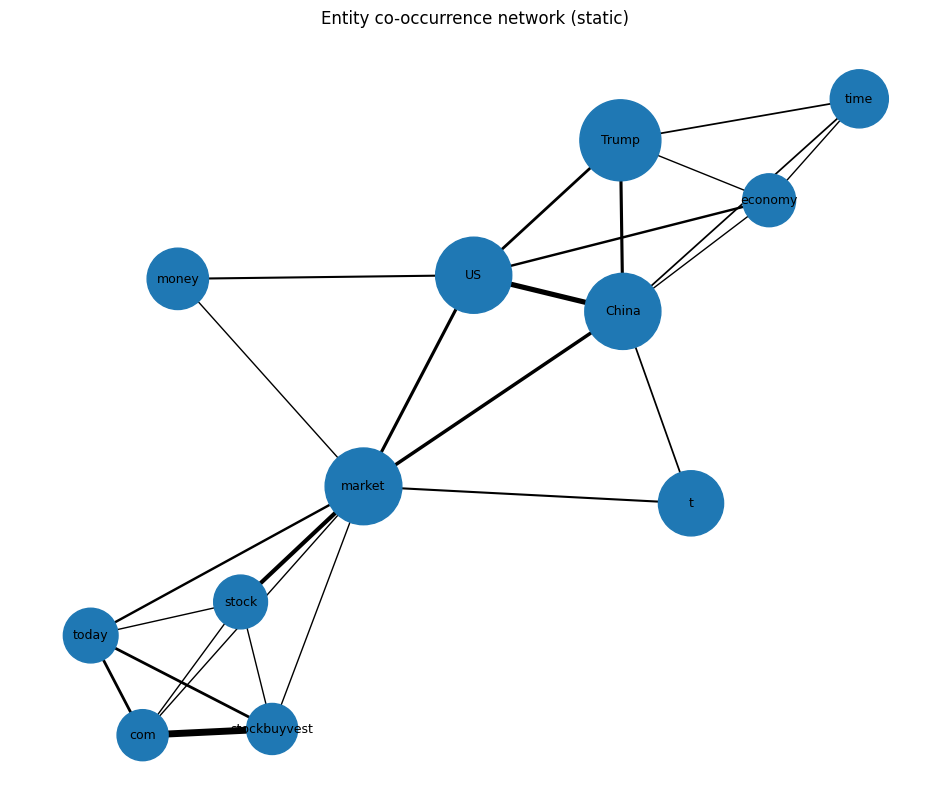

In [46]:
import networkx as nx

pairs = Counter()
node_counts = Counter()
for ents in df['parsed_entities']:
    unique = list(set([e for e in ents if e]))
    for e in unique:
        node_counts[e] += 1
    for i in range(len(unique)):
        for j in range(i+1, len(unique)):
            pair = tuple(sorted((unique[i], unique[j])))
            pairs[pair] += 1
# filter edges
min_edge_weight = 5
top_k_nodes = 15
edges = [(a,b,w) for (a,b),w in pairs.items() if w>=min_edge_weight]
# pick top nodes by frequency
top_nodes = set([n for n,_ in node_counts.most_common(top_k_nodes)])
G = nx.Graph()
for a,b,w in edges:
    if a in top_nodes and b in top_nodes:
        G.add_edge(a,b,weight=w)
# draw with networkx (static)
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, k=0.5)
weights = np.array([G[u][v]['weight'] for u,v in G.edges()])
nx.draw_networkx_nodes(G, pos, node_size=[300 + 50*node_counts[n] for n in G.nodes()])
nx.draw_networkx_edges(G, pos, width=1 + (weights - weights.min())/(weights.max()-weights.min()+1e-6)*4)
nx.draw_networkx_labels(G, pos, font_size=9)
plt.title('Entity co-occurrence network (static)')
plt.axis('off')
plt.show()

# Phase 2

In [47]:
### Begin Assignment Here